In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', 500)
file_path = 'data/STEMI.xlsx'
stemi_64 = pd.read_excel(file_path, sheet_name='64')
stemi_64.dropna(subset=['No'], how='all', inplace=True)


In [2]:
display((stemi_64.columns).tolist())

['Run No ใหม่',
 'No',
 'ชื่อ-สกุล',
 'ชาย',
 'หญิง',
 'อายุ',
 'HN',
 'AN',
 'ID',
 'ประเภท',
 '1.FMC',
 'Discharge',
 'LOS (วัน)',
 'ค่ารักษาพยาบาล',
 'สิทธิ์',
 'การมา',
 'Onset of Symptom : วันที่',
 'D to EKG : case walk in/ EMS/ IPD (นาที)',
 'D to EKG : case รพช.ใน จ.สงขลา (นาที)',
 'D to EKG : case รพ. เอกชน (นาที)',
 'D to EKG : case รพ. ตจว. (นาที)',
 'ระบุ เหตุผล EKG ช้า',
 'Diagnosis วันที่',
 'No Chest pain',
 'Typical CP',
 'Atypical CP',
 'Unknown  Angina',
 'No Dyspnea ',
 'DOE',
 'Orthopnea',
 'PND',
 'Unknown Dyspnea',
 'No Syncope',
 'Syncope',
 'No Cardiac arrest',
 'Yes Cardiac arrest',
 'แรกรับ at  หญ. : HR ',
 'แรกรับ : SBP',
 'แรกรับ : DBP',
 'แรกรับ : RR ',
 'แรกรับ O2 sat',
 '1. DM',
 '2. HT',
 '3. DLP',
 '4. Smoking',
 '4.1 No smoking',
 '5. FH',
 '6. Prior MI',
 '7. Prior HF',
 '8. Prior PCI',
 '9. Prior CABG',
 '10. CVA',
 '11. PAD',
 '12. COPD',
 '13. CKD ≥ Stage 3 (eGFR<60cc/min)',
 'Cr',
 'GFR',
 'Hx On Dialysis',
 '14. โรคร่วมอื่นๆ',
 'Elevate Trop N',


In [3]:
columns_profile = ['No', 'ชื่อ-สกุล', 'ชาย', 'หญิง', 'อายุ', 'HN', 'AN', 'ID', 'ประเภท']

columns_hospital = ['1.FMC',
 'Discharge',
 'LOS (วัน)',
 'ค่ารักษาพยาบาล',
 'สิทธิ์',
 'การมา']
 
columns_timing = ['Onset of Symptom : วันที่', 'D to EKG : case walk in/ EMS/ IPD (นาที)', 'D to EKG : case รพช.ใน จ.สงขลา (นาที)', 'D to EKG : case รพ. เอกชน (นาที)', 'D to EKG : case รพ. ตจว. (นาที)', 'ระบุ เหตุผล EKG ช้า']

columns_duration = ['No Chest pain',
 'Typical CP',
 'Atypical CP',
 'Unknown  Angina',
 'No Dyspnea ',
 'DOE',
 'Orthopnea',
 'PND',
 'Unknown Dyspnea',
 'No Syncope',
 'Syncope',
 'No Cardiac arrest',
 'Yes Cardiac arrest']
 
columns_first_vs = ['แรกรับ at  หญ. : HR ', 'แรกรับ : SBP', 'แรกรับ : DBP', 'แรกรับ : RR ', 'แรกรับ O2 sat']

columns_ud = ['1. DM',
 '2. HT',
 '3. DLP',
 '4. Smoking',
 '4.1 No smoking',
 '5. FH',
 '6. Prior MI',
 '7. Prior HF',
 '8. Prior PCI',
 '9. Prior CABG',
 '10. CVA',
 '11. PAD',
 '12. COPD',
 '13. CKD ≥ Stage 3 (eGFR<60cc/min)',
 'Cr',
 'GFR',
 'Hx On Dialysis',
 '14. โรคร่วมอื่นๆ']

columns_trop = ['Elevate Trop N', 'No Elevate Trop N']

columns_killip = ['Killip 1', 'Killip 2', 'Killip 3', 'Killip 4']

columns_complication = ['แรกรับมีภาวะแทรกซ้อน (ราย)', 'Cardiogenic shock', 'HF', 'แรกรับ On ETT','แรกรับ No ETT','A. Tachyarrhythmia','1. AF','2. SVT','3. Non-sustained VT ','4. VT/ VF','5. VT/VF Required defibrillation','6. CPR ','B. Bradyarrhythmia','1. CHB ','2. 2 ํ AV Block','On Ext. pace','On TPM','ระบุ : แรกรับมีภาวะแทรกซ้อน อื่นๆ','Echo in Visit','EF %',]
columns_sk = ['วันที่ให้ SK',
 'SK at หญ. ',
 'SK at หญ. เปิดหลอดเลือดสำเร็จ',
 'SK at หญ. เปิดหลอดเลือดไม่สำเร็จ',
 'SK at รพช. / รพท. / รพ. เอกชน  ใน จ. สงขลา',
 'SK at รพช. / รพท. / รพ. เอกชน ใน จ. สงขลา เปิดหลอดเลือดสำเร็จ',
 'SK at รพช. /รพท. / รพ. เอกชน ใน จ. สงขลา เปิดหลอดเลือดไม่สำเร็จ',
 'SK at ตจว.',
 'SK at ตจว. เปิดหลอดเลือดสำเร็จ',
 'SK at ตจว. เปิดหลอดเลือดไม่สำเร็จ',
 'SK หญ. D to N  (นาที)',
 'SK หญ. O to N (นาที)',
 'SK หญ. FMC to N (นาที)',
 'SK หญ. STEMI Dx to N (นาที)',
 'SK หญ. Door to Needle ≤ 30นาที (ราย)',
 'SK หญ. Dx to N ≤ 30นาที (ราย)',
 'SK รพช./ รพท. / รพ. เอกชน ใน จ. สงขลา D to N  (นาที)',
 'SK รพช./ รพท. / รพ. เอกชน ใน จ. สงขลา O to N (นาที) ',
 'SK รพช. / รพท. / รพ. เอกชนสงขลา FMC to N (นาที)',
 'รพช. / รพท. / รพ. เอกชน ใน จ. สงขลา STEMI Dx to N (นาที)',
 'SK รพช. / รพท. / รพ. เอกชนใน จ.สงขลา Door to N ≤ 30นาที (ราย)',
 'SK รพช./ รพท. / รพ. เอกชน ใน จ.สงขลา Dx to N ≤ 30นาที (ราย)',
 '1. No SK :  มี Contraindication',
 '2. No SK : Onset Time > 12 hr ',
 '3. No SK : Spontaneous Resolution',
 '4. No SK : Not Consent ',
 '5. No SK : Reason Unknown (Missed Dx, Delay Dx, Delay Consult)',
 'ระบุ คร่าวๆ : Reason Unknown ',
 'Major Bl จาก SK',
 'ระบุ : Major Bl จาก SK',
 'Minor Bl จาก SK',
 'ระบุ : Minor Bl จาก SK',
 '1. SE SK : BP drop',
 '2. SE SK : หน้ามืด',
 '3. SE SK : N/V',
 '4. SE SK : ผื่นแดง',
 '5. SE SK Anaphylaxis',
 '6. SE SK อื่นๆ ระบุ']

 
columns_pci = [ '1. PPCI ทั้งหมด',
 '1.1 Non Refer : PPCI',
 '1.2 Refer : PPCI',
 'Non Refer : D to B  นาที',
 'Non Refer : O to B นาที ',
 'Non Refer : FMC to D นาที',
 'Non Refer : STEMI Dx to D นาที',
 'Non Refer : STEMI Door to B ≤ 90นาที (ราย)',
 'Non Refer : STEMI Dx to D ≤ 60นาที (ราย)',
 'Non Refer : STEMI Dx to D ≤ 90นาที (ราย)',
 'Non Refer : STEMI Dx to D ≤ 120นาที (ราย)',
 'Refer case : D to B  นาที',
 'Refer case : O to B  นาที ',
 'Refer case : FMC to D นาที',
 'Refer case  : STEMI Dx to D นาที',
 ' Refer case : STEMI Door to B ≤ 90นาที (ราย)',
 'Refer case : STEMI Dx to D ≤120 นาที (ราย)',
 '2. Rescue PCI',
 '3. Phamacoinvasive Strategy (เฉพาะ TNK เท่านั้น)',
 '4. Routine early PCI for STEMI (Stable after successful full-dose Fibrinolytics',
 '5. PCI For Resent STEMI ',
 '6. Emergency CAG',
 '7. Elective CAG ',
 '8. Elective CAG + PCI',
 'วันที่ทำ CAG ± PCI',
 ' Puncture time : วันที่',
 'Time at First Device : วันที่',
 'Finish Time (Final Angio Time) วันที่',
 'พ. ผู้ทำ',
 'PCI in 72 hr',
 'PCI > 72 hr',
 'Procedure success : Yes',
 'Procedure success : No',
 'CAG in 72 hr',
 'CAG > 72 hr',
 'ผล CAG : SVD',
 'ผล CAG : DVD',
 'ผล CAG : TVD',
 'ผล CAG : TVD c LM',
 'ผล CAG : Non Sig',
 'ผล CAG อื่นๆ',
 'ผล PCI',
 'Right Vessel Dominant',
 'Left Vessel Dominant',
 'Co-Vessel Dominant',
 'ไม่ได้ CAG ± PCI in Visit นี้',
 '1. ปฏิเสธ PCI',
 '2. ไม่ได้ PCI :  เหตุผลอื่นๆ ',
 'On IABP',
 'On ECMO',
 'มี Major Bl จาก PCI',
 'ระบุ Major Bl จาก PCI',
 'มี Minor Bl จาก PCI',
 'ระบุ Minor Bl จาก PCI']

columns_inhos_complication = ['สรุปมีภาวะแทรกซ้อนขณะอยู่รพ. (ราย)',
 '1. HF',
 '1.1 HF : On Ventilator',
 '1.2 HF : No Ventilator',
 '2. Cardiogenic shock',
 '3. Stroke',
 '3.1 Ischemic Stroke',
 '3.2 Hemorrhagic Stroke',
 '3.3 Not known Stroke',
 '4. ARF จาก CIN',
 '4.1 Hemodialysis',
 '4.2 Peritonial dialysis',
 '4.3 Other : ล้างไตอื่นๆ ',
 '4.4 มี ARF (จาก CIN) แต่ไม่ได้ล้าง หรือไม่ต้องล้างไต',
 '5. รวมมี Minor Bleed (ราย)',
 '5.1 ระบุ : Minor Bleed (รวม)',
 '6. รวมมี Major Bl / Hematoma (ราย)',
 '6.1 ระบุ : Major Bl / Hematoma (รวม)',
 '6.3 Required Blood Transfusion']

columns_arrhythmia = ['รวม Arrhythmia ทั้งหมด (ราย)',
 'A: Tachyarrhythmia (ราย)',
 '1. AF.1',
 '2. SVT.1',
 '3. Non sustained VT',
 '4. VT/VF',
 '5. VT/VF Required defibrillation.1',
 '6. CPR',
 '7. CPR รอด',
 'B : Bradyarrhythmia (ราย)',
 '1. CHB .1',
 '2. 2 ํ AV Block.1',
 '3. Ext. pace',
 '4. TPM',
 'สรุปมี Arrhythmia อื่นๆ ขณะอยู่ รพ. : ระบุ']

columns_mech_comp = ['มี Mechanical Complication (ราย)',
 '1. VSR',
 '2. Rupture Free Wall',
 '3. Severe MR',
 '4. Stent Thrombosis',
 '5. Other : Mechanical Complication ระบุ']

columns_death = ['D/C Death ทั้งหมด',
 'ตาย : ได้ SK หาดใหญ่',
 'ตาย : ได้ SK ใน จ. สงขลา',
 'ตาย : ได้ SK นอก จ. สงขลา',
 'ตาย : ได้ PPCI',
 'ตาย : ได้ RPCI',
 'ตาย : Elective PCI',
 'ตาย : On IABP',
 'ตาย : On ECMO',
 '1. ตาย: Pump Failure',
 '2. ตาย: Arrhythmia',
 '3. ตาย: Mechanical complication',
 'ระบุ ตาย: Mechanical complication',
 '4. ตาย: Non cardiac cause',
 'ระบุ ตาย: Non cardiac cause',
 '5. ตาย : SCD',
 'ตาย: Killip 1',
 'ตาย: Killip 2',
 'ตาย: Killip 3',
 'ตาย: Killip 4',
 'ตาย : Walk in ',
 'ตาย: ผู้ป่วยใน รพ. ',
 'ตาย: EMS ',
 'ตาย : Refer ใน จ. สงขลา ',
 'ระบุชื่อรพ. ตาย : Refer ใน จ. สงขลา ',
 'ตาย : Refer ตจว.',
 'ระบุชื่อรพ. ตาย : Refer ตจว. ',
 'ตาย : รพ. เอกชน Refer',
 'ระบุชื่อรพ. ตาย : รพ. เอกชน Refer',
 'ตาย : รพ. มอ. Refer']

columns_discharge = ['D/C ทุเลา',
 'D/C ไม่สมัครอยู่',
 'เหตุผล : D/C ไม่สมัครอยู่',
 'Refer กลับ รพ. เดิม/ รพ. อื่น',
 'ระบุ รพ. Refer กลับรพ. เดิม/ รพ. อื่น',
 'เหตุผล: Refer กลับรพ. เดิม/ รพ. อื่น',
 'Referรพ. ศักยภาพสูงกว่า',
 'ระบุ รพ. Refer รพ. ศักยภาพสูงกว่า',
 'เหตุผล : Referรพ.ศักยภาพสูงกว่า',
 'Refer รพ. เอกชน',
 'ระบุ รพ. Refer เอกชน',
 'เหตุผล Refer รพ. เอกชน',
 'หนีกลับ',
 'HM 1. ASA',
 'ไม่ได้ HM ASA : ระบุเหตุผล',
 'HM : 2. P2Y12 inhibitors',
 '2.1 Clopidogrel',
 '2.2 Prasugrel',
 '2.3 Ticagrelor',
 'ไม่ได้ HM P2Y12 inhibitor : ระบุเหตุผล',
 'HM 3. Beta blocker',
 'HM 4. ACEI/ ARB',
 'HM 5. Statin',
 'HM 6. Wafarin',
 'HM 6.1 NOAC']

columns_diagnosis = ['1. Initial Dx I210 : STEMI AW',
 '2. Initial Dx I211 : STEMI IW',
 '3. Initial Dx I212 : STEMI other site ',
 '4. Initial Dx I213 : STEMI unspecified site',
 '5. Initial Dx I214 : NSTEMI',
 '6. Initial Dx I200 : Unstable Angina',
 ' 7. Initial Dx อื่นๆ ระบุ',
 '1. MI type I',
 '2. MI type II',
 '3. MI type III',
 '4. MI type IV',
 '4.1 MI type IV a',
 '4.2 MI type IV b',
 '4.2 MI type IV c',
 '4. MI type V',
 'Final Dx 1. I210 : STEMI AW',
 'F 2. I211 : STEMI IW',
 'F 3. I212 : STEMI other site ',
 'F 4. I213 : STEMI unspecified site',
 'F 5. I214 : NSTEMI',
 'F 6. I200 : Unstable Angina',
 'F 7. I220 : Subsequent AW MI (Recent MI in 28 วัน)',
 'F 8. I221 : Subsequent IW MI (Recent MI in 28 วัน)',
 'F 9. I228 : Subsequent other site MI (Recent MI in 28 วัน)',
 'F 10. Final Dx อื่นๆ ระบุ',
 'บันทึกข้อมูล / ปัญหาต่าง ๆ']

In [4]:
stemi_64[columns_hospital]

,1.FMC,Discharge,LOS (วัน),ค่ารักษาพยาบาล,สิทธิ์,การมา
0,2020-10-09 09:05:00,2020-10-16 14:17:00,7.0,143032.88,สิทธิ์ UC,EMS
1,2020-10-06 13:40:00,2020-10-08 14:49:00,2.0,112505.50,สิทธิ์ UC,รพช. รัตภูมิ
2,2020-10-01 06:00:00,2020-10-04 00:00:00,3.0,216389.00,สิทธิ์ UC,รพ. สตูล
3,2020-10-05 12:52:00,2020-10-07 15:25:00,2.0,106806.25,สิทธิ์ UC,รพ. ราษฏร์ยินดี
4,2020-09-30 16:44:00,2020-10-03 12:07:00,3.0,128692.25,เบิกได้,รพช. ควนเนียง
...,...,...,...,...,...,...
272,2020-09-20 02:00:00,2020-09-23 18:49:00,3.0,170739.00,สิทธิ์ UC,รพช. นาทวี
273,2020-09-20 17:12:00,2020-09-25 14:05:00,5.0,122844.50,สิทธิ์ UC,Walk in
274,2020-08-06 08:00:00,2020-09-17 15:03:00,42.0,149792.00,สิทธิ์ UC,รพช. ปาดังเบซาร์
275,2020-09-13 20:24:00,2020-09-18 13:02:00,5.0,28415.50,เบิกได้,Walk in


In [5]:
columns_feather = columns_profile + columns_first_vs + columns_ud + columns_complication + columns_trop + columns_killip

In [6]:
columns_killip

['Killip 1', 'Killip 2', 'Killip 3', 'Killip 4']

In [7]:
selected_feather = ['อายุ',
 'แรกรับ at  หญ. : HR ',
 'แรกรับ : SBP',
 'แรกรับ : DBP',
 'แรกรับ : RR ',
 'แรกรับ O2 sat',
 '1. DM',
 '2. HT',
 '3. DLP',
 '4. Smoking',
 '4.1 No smoking',
 '5. FH',
 '6. Prior MI',
 '7. Prior HF',
 '8. Prior PCI',
 '9. Prior CABG',
 '10. CVA',
 '11. PAD',
 '12. COPD',
 '13. CKD ≥ Stage 3 (eGFR<60cc/min)',
 'Hx On Dialysis',
 'Cardiogenic shock',
 'HF',
 'แรกรับ On ETT',
 'แรกรับ No ETT',
 'A. Tachyarrhythmia',
 '1. AF',
 '2. SVT',
 '3. Non-sustained VT ',
 '4. VT/ VF',
 '5. VT/VF Required defibrillation',
 '6. CPR ',
 'B. Bradyarrhythmia',
 '1. CHB ',
 '2. 2 ํ AV Block',
 'On Ext. pace',
 'On TPM',
 'Echo in Visit',
 'EF %',
 'Elevate Trop N',
 'No Elevate Trop N',
 'Killip 1',
 'Killip 2',
 'Killip 3',
 'Killip 4',
 'D/C Death ทั้งหมด']

In [8]:
features = stemi_64[selected_feather]

In [9]:
def replacestrwithnan(df, col):
    rep_col = []
    for i in df[col]:
        if type(i) == str:
            rep_col.append(np.nan)
        else:
            rep_col.append(i)
    new_df = df.copy()
    new_df[col] = rep_col
    return new_df

def fillnawithmean(df, col):
    new_df = df.copy()
    mean_value = np.floor(new_df[col].mean())
    new_df[col].fillna(mean_value.round(), inplace=True)
    return new_df

In [10]:
features = replacestrwithnan(features, 'แรกรับ : RR ')
features = replacestrwithnan(features, 'แรกรับ O2 sat')
features = replacestrwithnan(features, '11. PAD')
features = replacestrwithnan(features, 'EF %')
features = replacestrwithnan(features, 'Elevate Trop N')
features = replacestrwithnan(features, 'No Elevate Trop N')

In [11]:
features = fillnawithmean(features, 'แรกรับ : RR ')
features = fillnawithmean(features, 'แรกรับ O2 sat')
features = fillnawithmean(features, 'EF %')

In [12]:
features['No Elevate Trop N'] = features['No Elevate Trop N'].fillna(1)
features = features.fillna(0)

In [13]:
string_columns = features.select_dtypes(include='object').columns
display(string_columns)

Index([], dtype='object')

In [14]:
columns_dict = {}
k = 1
for i in selected_feather:
    columns_dict[i] = k
    k = k + 1

# features = features.rename(columns=columns_dict)

list_rename = ['age',
 'hr',
 'sbp',
 'dbp',
 'rr',
 'o2sat',
 'dm',
 'ht',
 'dlp',
 'smoking',
 'no_smoking',
 'familia_hx',
 'prior_mi',
 'prior_hf',
 'prior_pci',
 'prior_cabg',
 'cva',
 'pad',
 'copd',
 'ckd_stage3',
 'dialysis',
 'cardiogenic_shock',
 'hf',
 'ett',
 'no_ett',
 'tachy_arrhy',
 'af',
 'svt',
 'non_sus_vt',
 'vt_vf',
 'vt_vf_defib',
 'cpr',
 'brady_arrhy',
 'chb',
 '2_av_block',
 'on_ext_pace',
 'on_tpm',
 'echo',
 'ef',
 'elev_trop_t',
 'no_elev_trop_t',
 'killip_1',
 'killip_2',
 'killip_3',
 'killip_4',
 'death']

features.columns = list_rename

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


c:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [33]:
X = features.drop(columns='death')
y = features['death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:35] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd

[20:18:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:35] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd

[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:36] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd

[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:18:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters found:  {'max_depth': 3, 'n_estimators': 200}
Mean squared error:  0.16071428571428573


In [34]:
# Best parameters found:  {'max_depth': 5, 'n_estimators': 50}
# Mean squared error:  0.07142857142857142

model_fine = xgb.XGBClassifier(max_depth=5, n_estimators=200)
model_fine.fit(X_train, y_train)
y_pred = model_fine.predict(X_test)



[20:18:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [35]:
f1 = f1_score(y_test, y_pred)
display("F1 score:", f1)

'F1 score:'

0.3333333333333333

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92        49
         1.0       0.40      0.29      0.33         7

    accuracy                           0.86        56
   macro avg       0.65      0.61      0.63        56
weighted avg       0.84      0.86      0.85        56



In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [38]:
y_pred_proba = model_fine.predict_proba(X_test)

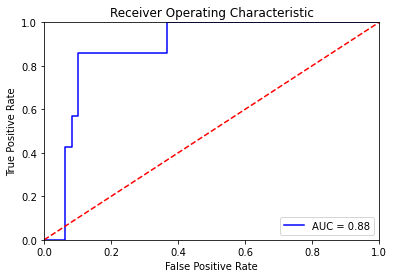

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

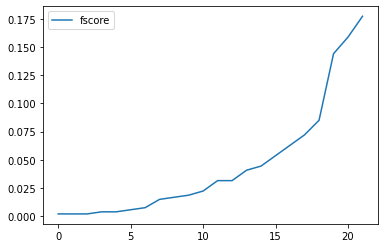

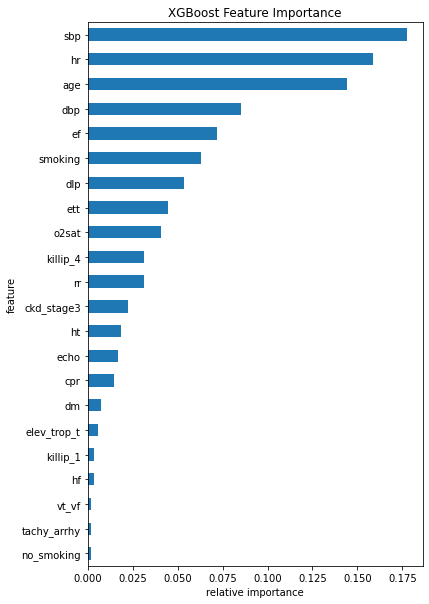

In [40]:
# Get feature importance values
importance = model_fine.get_booster().get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1])

# Plot feature importance
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [24]:
columns_dict

{'อายุ': 1,
 'แรกรับ at  หญ. : HR ': 2,
 'แรกรับ : SBP': 3,
 'แรกรับ : DBP': 4,
 'แรกรับ : RR ': 5,
 'แรกรับ O2 sat': 6,
 '1. DM': 7,
 '2. HT': 8,
 '3. DLP': 9,
 '4. Smoking': 10,
 '4.1 No smoking': 11,
 '5. FH': 12,
 '6. Prior MI': 13,
 '7. Prior HF': 14,
 '8. Prior PCI': 15,
 '9. Prior CABG': 16,
 '10. CVA': 17,
 '11. PAD': 18,
 '12. COPD': 19,
 '13. CKD ≥ Stage 3 (eGFR<60cc/min)': 20,
 'Hx On Dialysis': 21,
 'Cardiogenic shock': 22,
 'HF': 23,
 'แรกรับ On ETT': 24,
 'แรกรับ No ETT': 25,
 'A. Tachyarrhythmia': 26,
 '1. AF': 27,
 '2. SVT': 28,
 '3. Non-sustained VT ': 29,
 '4. VT/ VF': 30,
 '5. VT/VF Required defibrillation': 31,
 '6. CPR ': 32,
 'B. Bradyarrhythmia': 33,
 '1. CHB ': 34,
 '2. 2 ํ AV Block': 35,
 'On Ext. pace': 36,
 'On TPM': 37,
 'Echo in Visit': 38,
 'EF %': 39,
 'Elevate Trop N': 40,
 'No Elevate Trop N': 41,
 'Killip 1': 42,
 'Killip 2': 43,
 'Killip 3': 44,
 'Killip 4': 45,
 'D/C Death ทั้งหมด': 46}

In [25]:
### Exporting moddel

model_all = xgb.XGBClassifier(max_depth=5, n_estimators=50)
model_all.fit(X, y)

# import pickle
# with open('death_model.pkl', 'wb') as f:
#     pickle.dump(model_all, f)

[19:46:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

k = 10
kf = KFold(n_splits=k)
scores = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = xgb.XGBClassifier(max_depth=5, n_estimators=200)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average='macro')
    scores.append(score)
    
avg_score = sum(scores) / len(scores)

print(avg_score)


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd

[20:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:18] WARNING:

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

[20:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6114212455899386


c:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [43]:
# k-NN Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params_knn = {'n_neighbors': np.arange(1, 25)}

knn_gs = GridSearchCV(knn, params_knn, cv=5)

knn_gs.fit(X_train, y_train)

knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_)

{'n_neighbors': 12}


In [44]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params_rf = {'n_estimators': [50, 100, 200]}

rf_gs = GridSearchCV(rf, params_rf, cv=5)

rf_gs.fit(X_train, y_train)

rf_best = rf_gs.best_estimator_

print(rf_gs.best_params_)

{'n_estimators': 50}


In [45]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

knn: 0.875
rf: 0.9642857142857143
log_reg: 0.9107142857142857


In [47]:
from sklearn.ensemble import VotingClassifier

estimators =  [('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]

ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(X_train, y_train)

ensemble.score(X_test, y_test)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9464285714285714

In [49]:
#Fit Ensemble model to all data
knn_all = KNeighborsClassifier(n_neighbors=12)
knn_all.fit(X, y)

rf_all = RandomForestClassifier(n_estimators=50)
rf_all.fit(X, y)

log_reg_all = LogisticRegression()
log_reg_all.fit(X, y)

estimators_all =  [('knn', knn_all), ('rf', rf_all), ('log_reg', log_reg_all)]
ensemble_all = VotingClassifier(estimators_all, voting='hard')
ensemble_all.fit(X, y)


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=12)),
                             ('rf', RandomForestClassifier(n_estimators=50)),
                             ('log_reg', LogisticRegression())])

In [50]:
import pickle

filename = 'death_model_ensemble.pkl'
with open(filename, 'wb') as f:
    pickle.dump(ensemble_all, f)